<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Code/FirstLookAt_AR_and_MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First look at MA(1) and AR(1) processes... and a game!

Stephen Becker, STAT/MATH 4540/5540 Intro to Time Series, Spring 2022

## MA(1): first-order moving average
For a MA(1) process with parameter $\theta$ and noise term with variance $\sigma^2$, this means $\{Z_t\}\sim\text{WN}(0,\sigma^2)$ and 
$$ X_t = Z_t + \theta Z_{t-1}.
$$


The [ACF](https://en.wikipedia.org/wiki/Autocorrelation#Auto-correlation_of_stochastic_processes) we worked out in class is
$$\rho(h) = \begin{cases} 1 & h=0 \\ \frac{\theta}{1+\theta^2} & h=\pm 1 \\ 0 & |h| > 1 \end{cases}$$

- Is that what we see?

- Do the resuls depend on how many time series we simulate?

- What is a negative ACF mean?

- What's the **average** of the MA(1) process?

[1] "Expected ACF(h=1) is 0.1"

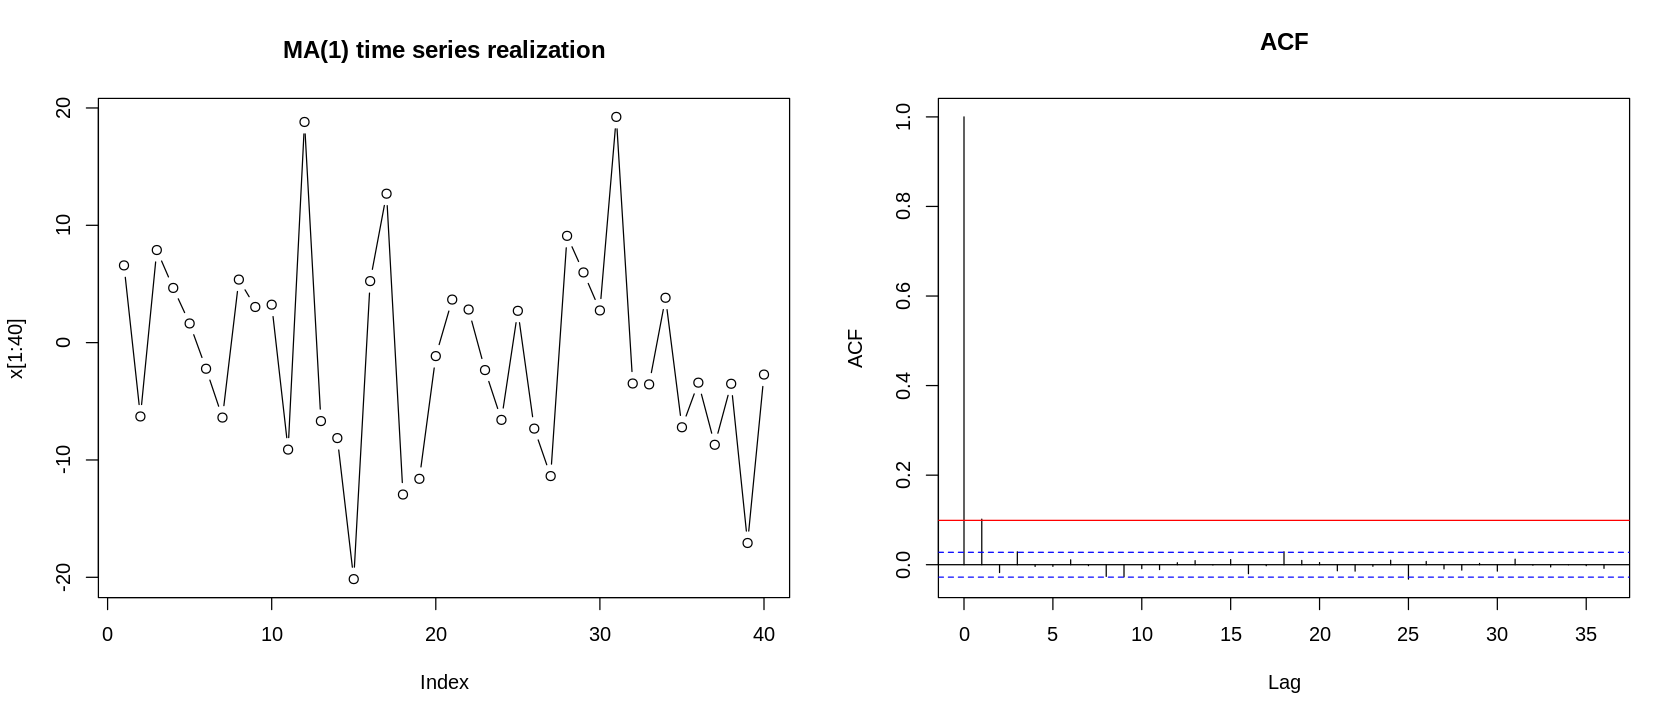

In [18]:
# Task: play around with different theta values. Any real number is valid

theta <- 1
# theta <- .1
theta <- 10
x <- arima.sim( n=5e3, model=list(ma=theta) )
par(mfrow=c(1,2))
options(repr.plot.width = 14, repr.plot.height=6)
plot( x[1:40], type='b',main='MA(1) time series realization')
acf(x,main='ACF')
d = theta/(1+theta^2)
sprintf("Expected ACF(h=1) is %.1f", d)
abline(h=d,col="red")

#### What's the difference beteween $\theta=1$ and $\theta=-1$?

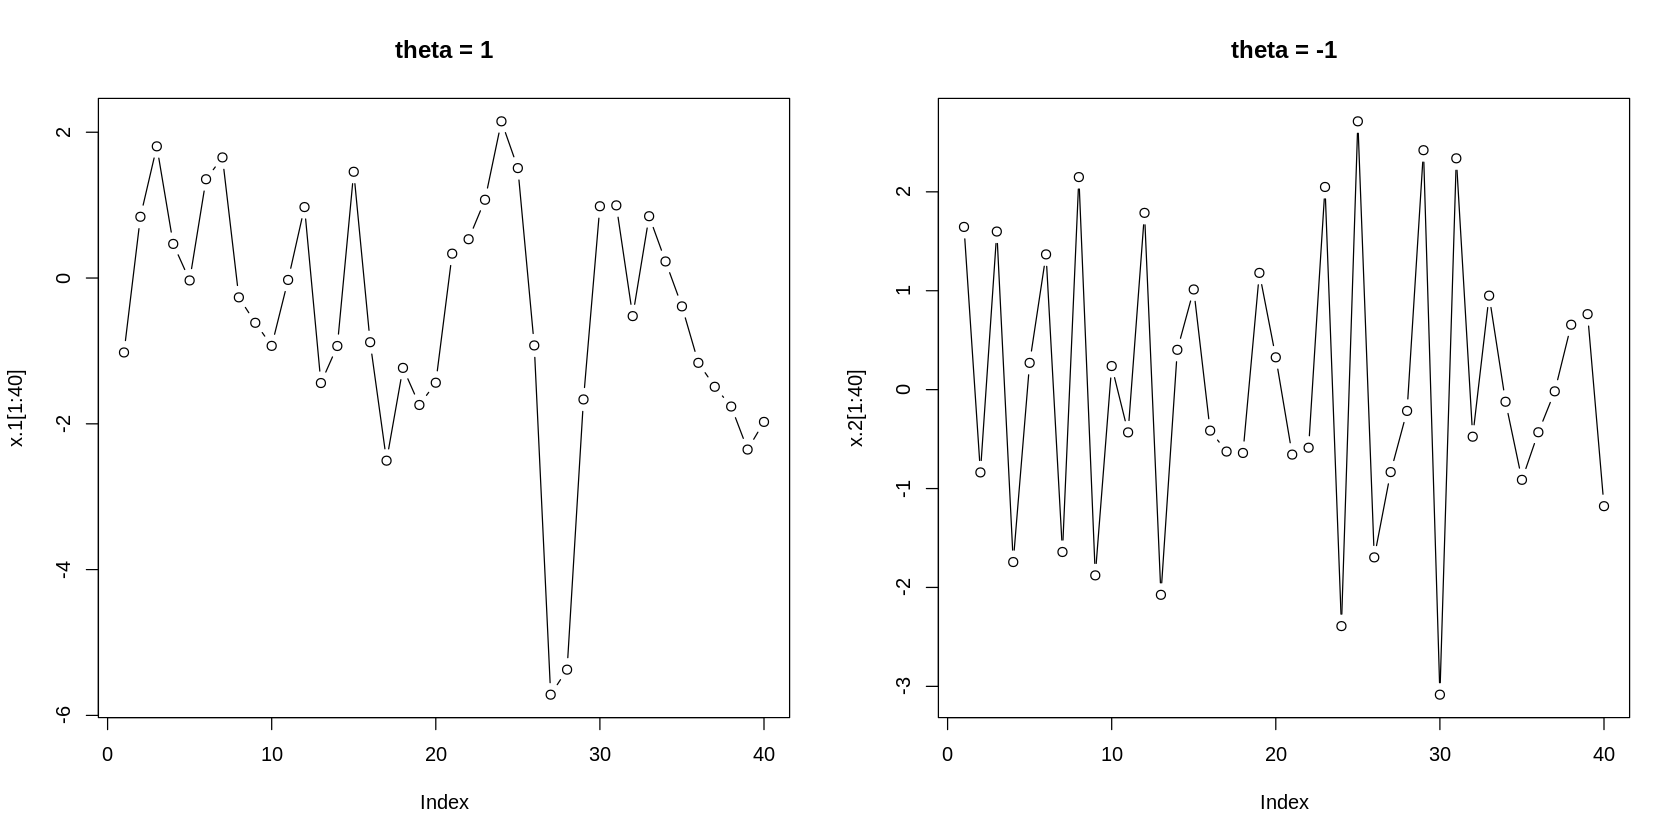

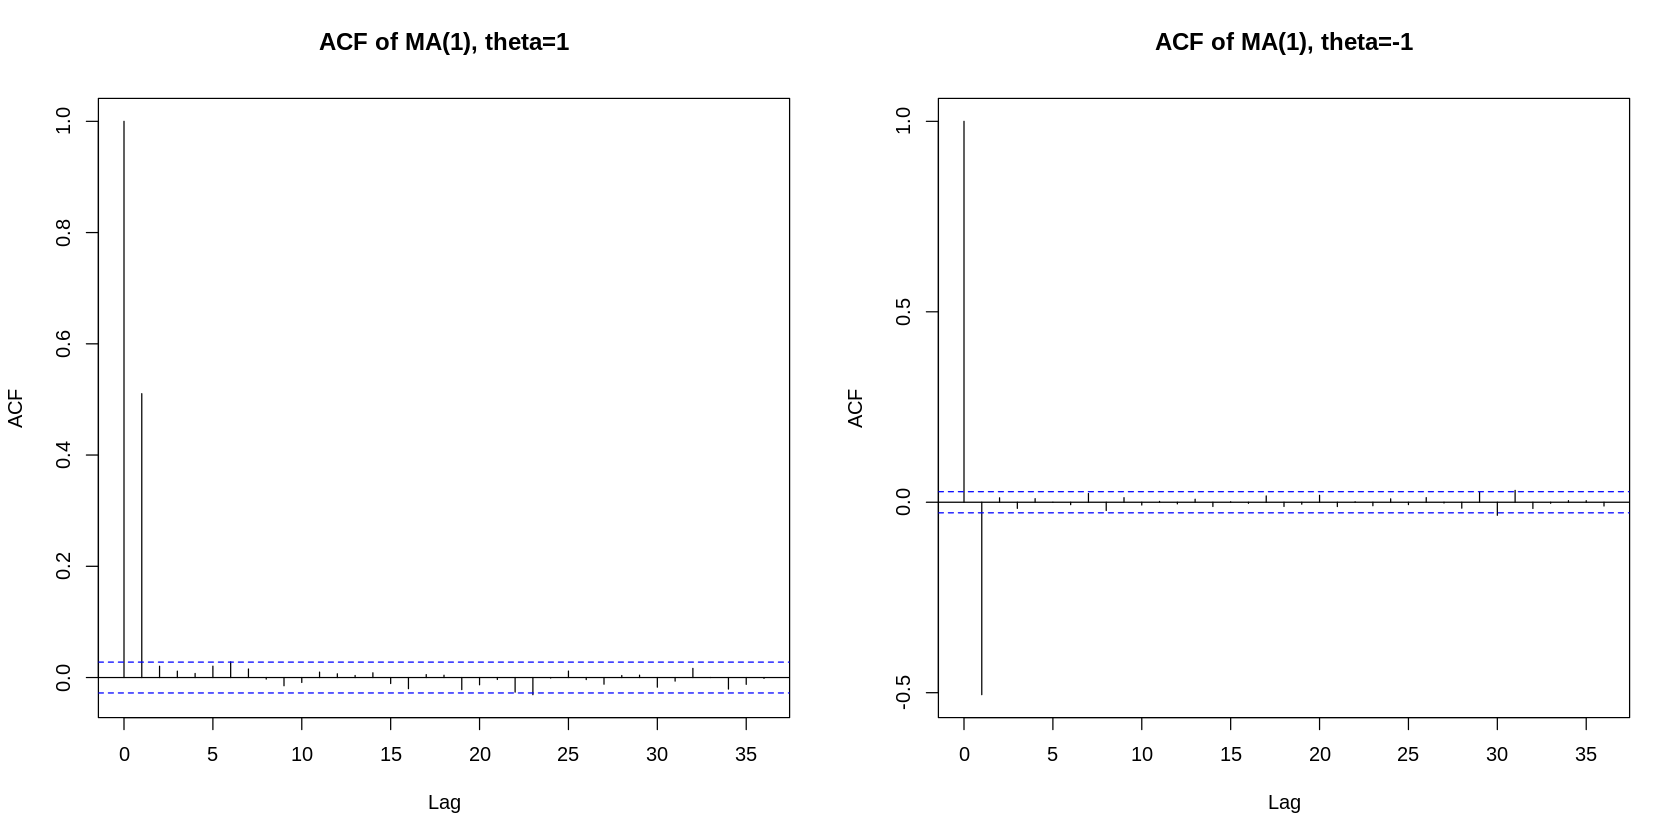

In [2]:
n <- 5e3
x.1     <- arima.sim( n=n, model=list(ma=1) )
x.2     <- arima.sim( n=n, model=list(ma=-1) )

options(repr.plot.width = 14, repr.plot.height=6)
par(mfrow=c(1,2))
plot( x.1[1:40], type='b',main="theta = 1")
plot( x.2[1:40], type='b',main="theta = -1")

acf(x.1,main="ACF of MA(1), theta=1")
acf(x.2,main="ACF of MA(1), theta=-1")

## AR(1): First-order Autoregressive Process

For a AR(1) process with parameter $|\phi| < 1$ and noise term with variance $\sigma^2$, this means $\{Z_t\}\sim\text{WN}(0,\sigma^2)$ and $\{X_t\}$ is the stationary solution to the stochastic difference equation
$$ X_t = \phi X_{t-1} + Z_{t-1}.
$$


The ACF we worked out in class is
$$\rho(h) = \phi^{|h|}$$

Is that what we see?

Do the resuls depend on how many time series we simulate?

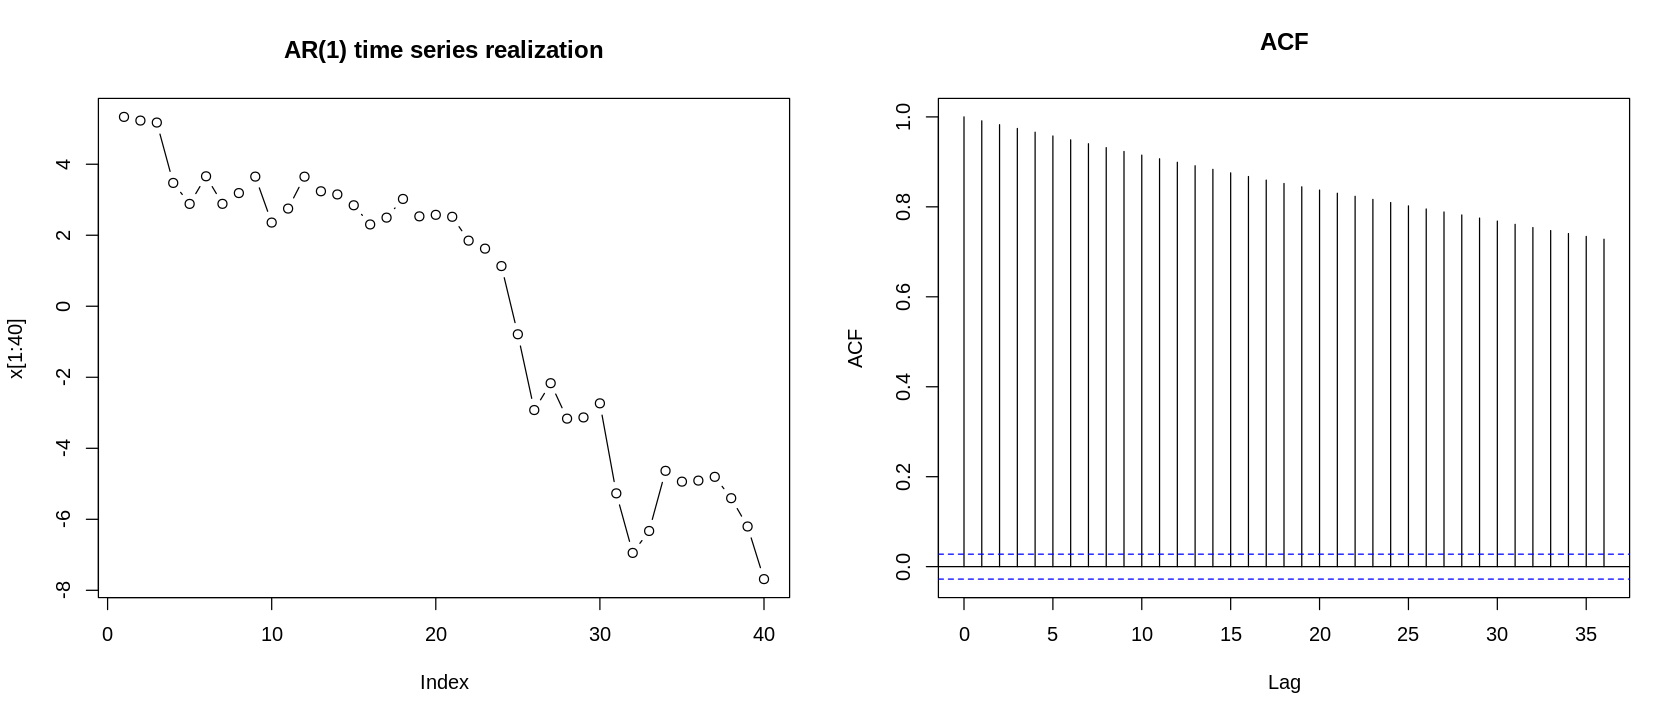

In [20]:
# TASK: play around with different phi values, |phi| < 1

phi <- .99
# phi <- 0
# phi <- .4
# phi <- -.4

par(mfrow=c(1,2))
options(repr.plot.width = 14, repr.plot.height=6)
x <- arima.sim( n=5e3, model=list(ar=phi))
plot( x[1:40], type='b',main='AR(1) time series realization')
acf(x,main='ACF')

## Let's play a game

In `warmup = TRUE` mode, this will give you some training images to learn from. You'll see two time series, and then two ACF plots. The ACF plots are of the time series, but half the time, the order of the ACF plots is flipped.

When you've practiced a bit, set `warmup = FALSE` and you (working together with a partner) now try to guess correctly whether then ACF plots are switched or not.

Below, to answer 'Yes' or True to a question, please enter `1` or `TRUE` or `T`

and to answer 'No' or False to a question, please enter `0` or `FALSE` or `F`

**Note**: in Colab, I am not able to make the plot appear *before* the input (or answer, if in warmup mode). However, this should run much better in RStudio where there is a dedicated window for figures.  You can copy this code to RStudio and run it there.

### The setup code (execute once)

In [29]:
playGame <- function( numGames = 1, warmup=FALSE, n=5e3, nPlot=80 ) {

  cat(sprintf("We are playing %d games\n\n", numGames))

  numCorrect <- 0

  for (game in 1:numGames) {
    cat(paste(rep("=",100), collapse= ""))
    cat('\n')

    theta.1 <- runif(1,min=-20,max=20) # uniform [-20,20]
    phi.1   <- runif(1,min=-1,max=1) # uniform [-1,1]
    x.1     <- arima.sim( n=n, model=list(ar=phi.1,ma=theta.1) )

    theta.2 <- runif(1,min=-20,max=20) # uniform [-20,20]
    phi.2   <- runif(1,min=-1,max=1) # uniform [-1,1]
    x.2     <- arima.sim( n=n, model=list(ar=phi.2,ma=theta.2) )

    options(repr.plot.width = 14,repr.plot.height = 10)
    par(mfrow=c(2,2))
    plot( x.1[1:nPlot], type='b',main="First time series")
    plot( x.2[1:nPlot], type='b',main="Second time series")

    flipPlots = as.logical( rbinom(1,1,1/2) )
    if (flipPlots){
      acf(x.2,main="ACF of first time series (?)")
      acf(x.1,main="ACF of second time series (?)")
    } else {
      acf(x.1,main="ACF of first time series (?)")
      acf(x.2,main="ACF of second time series (?)")
    }
    # Sys.sleep(0)
    # devAskNewPage(TRUE)  
    # dev.flush()

    # Ask for user to guess if plots have been flipped/switched around
    if (!warmup){
      # flush.console()
      cat('Are the plots flipped?\n')
      guess <- as.logical(readline(" T/F? > "))
      # flush.console()
      # devAskNewPage(FALSE)
    
      if (guess == flipPlots){
        numCorrect <- numCorrect + 1
        cat("Nice job, you got it right!\n")
      } else {
        cat("Sorry, incorrect\n")
      }
    }
    if (flipPlots){
      cat('The plots **were switched**!\n')
    } else {
      cat('The plots were not switched\n')
    }
    cat(sprintf('  (First time series:  AR phi is %.1f, MA theta is %.1f)\n',phi.1,theta.1))
    cat(sprintf('  (Second time series: AR phi is %.1f, MA theta is %.1f)\n',phi.2,theta.2))
    cat(paste(rep("=",100), collapse= ""))
    cat('\n')
  }
  if (!warmup){
    cat(sprintf("You got %d of %d correct, for a %.1f%% rate", numCorrect, numGames, 100*numCorrect/numGames))
  }
  return(numCorrect)
}

### Now play the game

We are playing 1 games

The plots **were switched**!
  (First time series:  AR phi is -0.0, MA theta is -12.7)
  (Second time series: AR phi is -0.4, MA theta is 15.4)


[1] 0

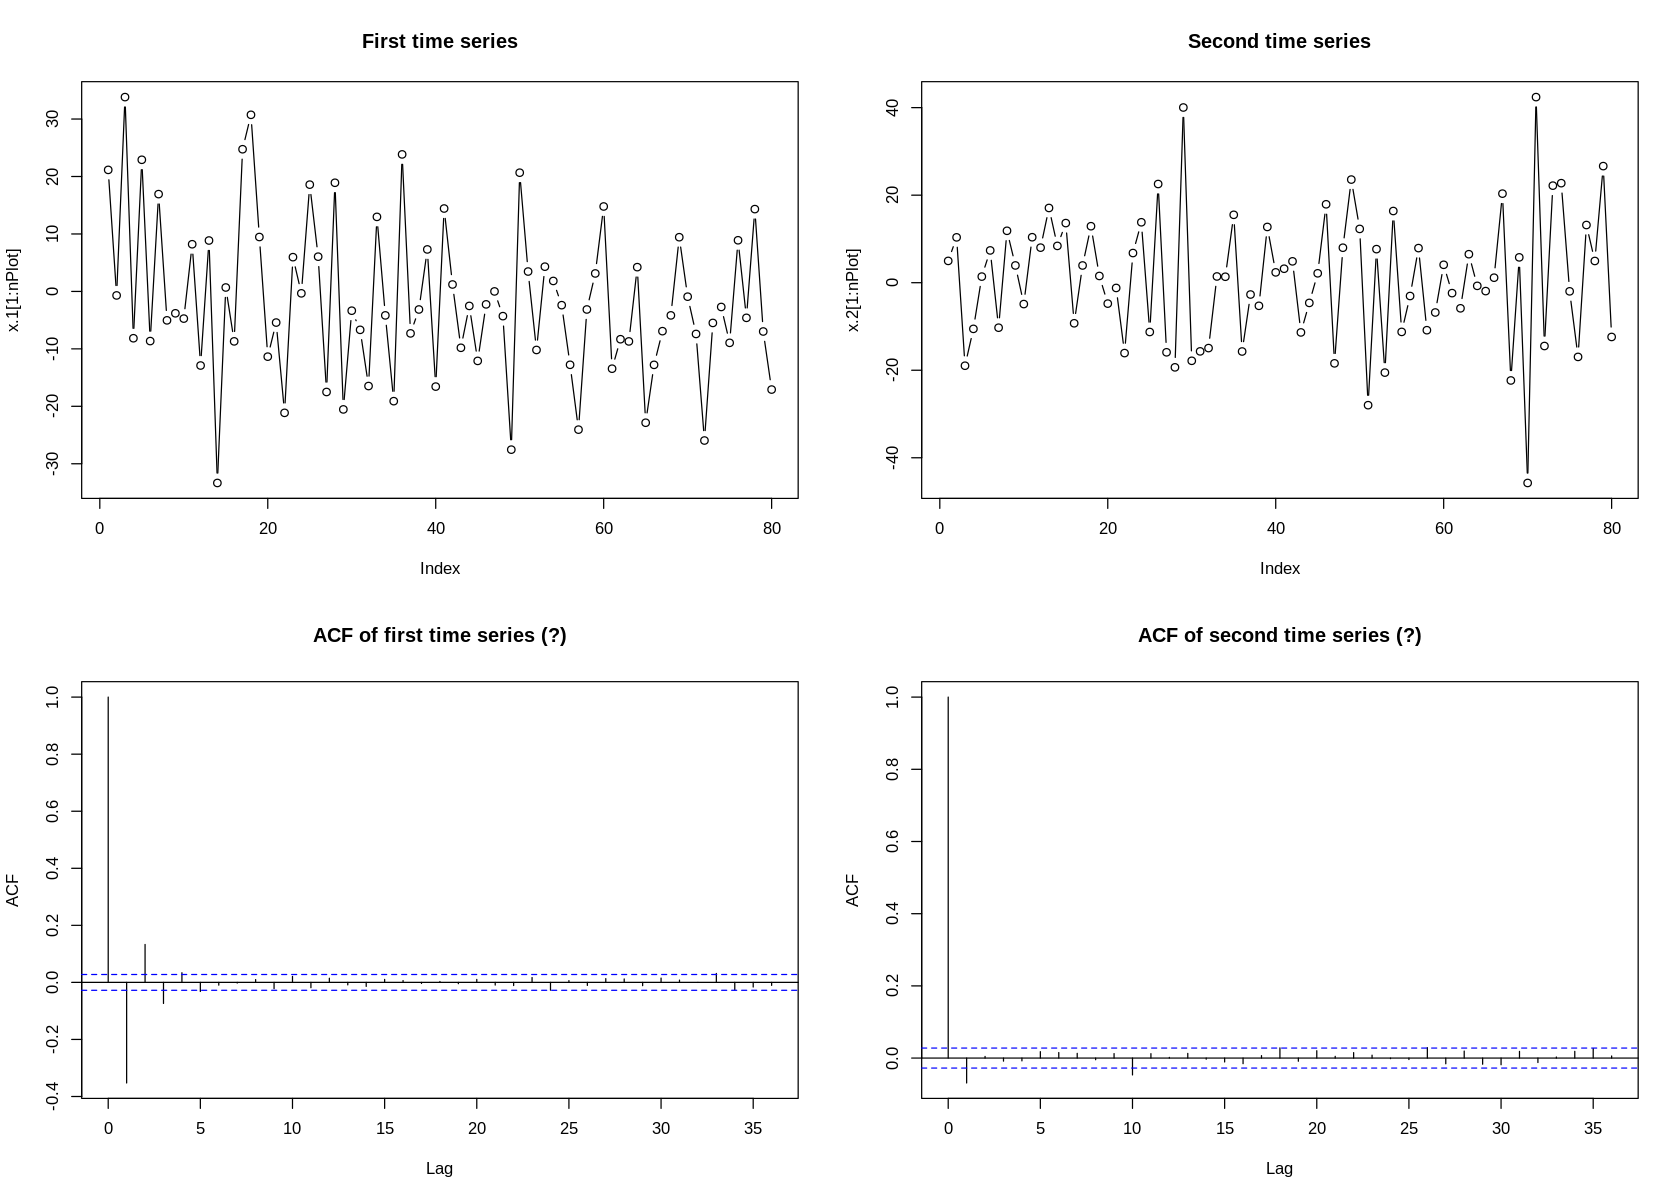

In [32]:
playGame(numGames = 1, warmup=TRUE )